In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

In [2]:
test = pd.read_csv("test.csv")
print('test:', len(test))
train = pd.read_csv("train.csv")
print('train:', len(train))
SalePrice = train['SalePrice']
train.drop("SalePrice", axis=1, inplace=True)

test: 1459
train: 1460


In [3]:
dataframes = [train, test]
data = pd.concat(dataframes, ignore_index=True)
len(data)

2919

In [4]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
data["PoolQC"] = data["PoolQC"].fillna(0)
data["ExterQual"] = data["ExterQual"].fillna(0)
data["ExterCond"] = data["ExterCond"].fillna(0)
data["BsmtQual"] = data["BsmtQual"].fillna(0)
data["BsmtCond"] = data["BsmtCond"].fillna(0)
data["HeatingQC"] = data["HeatingQC"].fillna(0)
data["KitchenQual"] = data["KitchenQual"].fillna(0)
data["FireplaceQu"] = data["FireplaceQu"].fillna(0)
data["GarageQual"] = data["GarageQual"].fillna(0)
data["GarageCond"] = data["GarageCond"].fillna(0)
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)

In [6]:
data = data.replace("Ex", 5)
data = data.replace("Gd", 4)
data = data.replace("TA", 3)
data = data.replace("Fa", 2)
data = data.replace("Po", 1)

In [7]:
data["CentralAir"] = data["CentralAir"].replace("Y", 1)
data["CentralAir"] = data["CentralAir"].replace("N", 0)
data["CentralAir"].value_counts() #YES or No variable

1    2723
0     196
Name: CentralAir, dtype: int64

In [8]:
neighborhood_dict = {'MeadowV': 0,'IDOTRR': 0,'BrDale': 0,'OldTown': 0,'Edwards': 0,'BrkSide': 0,'Sawyer': 0,'Blueste': 0,'SWISU': 0,
                     'NAmes': 0, 'NPkVill': 0, 'Mitchel': 0, 'SawyerW': 1, 'Gilbert': 1, 'NWAmes': 1, 'Blmngtn': 1, 'CollgCr': 1,
                     'ClearCr': 1, 'Crawfor': 1, 'Veenker': 1, 'Somerst': 1,'Timber': 1, 'StoneBr': 2, 'NoRidge': 2, 'NridgHt': 2}

In [9]:
data['Neighborhood_Class'] = data['Neighborhood']
data['Neighborhood_Class'].replace(neighborhood_dict, inplace = True)

In [10]:
data.drop("Id", axis=1, inplace=True) #first of all we drop because it was assigned randomly and brings no value
data.drop("GarageCars", axis=1, inplace=True) # we drop GarageCars because it is logical that number of cars depends on the garage area
data.drop("PoolQC", axis=1, inplace=True)
data.drop("MiscFeature", axis = 1, inplace = True)
data.drop("BedroomAbvGr", axis = 1, inplace = True)
data.drop("1stFlrSF", axis = 1, inplace = True)
data.drop("2ndFlrSF", axis = 1, inplace = True)
data.drop("GarageCond", axis = 1, inplace = True)
data.drop("LowQualFinSF", axis = 1, inplace = True)
data.drop("Neighborhood", axis = 1, inplace = True)
data.drop("TotalBsmtSF", axis=1, inplace=True)

In [11]:
data_onehot = pd.get_dummies(data, columns=['Foundation', 'GarageFinish', 'LandSlope', 'LotConfig', 'GarageQual',
 'LandContour', 'Utilities', 'GarageType', 'LotShape', 'Alley',
 'Street', 'Fence', 'MSZoning', 'SaleType',
 'PavedDrive', 'FireplaceQu', 'Condition1', 'Functional',
  'BsmtExposure', 'BsmtFinType1', 'ExterQual', 'BsmtFinType2',
 'MasVnrType', 'Exterior2nd', 'Heating', 'SaleCondition',
 'Electrical', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType',
 'Condition2', 'KitchenQual', 'ExterCond', 'CentralAir', 'HeatingQC'])

In [12]:
data_onehot['GarageArea'] = np.log(data_onehot['GarageArea']+1)

data_onehot['BsmtUnfSF'] = np.log(data_onehot['BsmtUnfSF']+1)

data_onehot['BsmtFinSF1'] = np.log(data_onehot['BsmtFinSF1']+1)

data_onehot['BsmtFinSF2'] = np.log(data_onehot['BsmtFinSF2']+1)

In [13]:
data_onehot['GarageYrBlt'] = data_onehot['GarageYrBlt'].fillna(0)
data_onehot['MasVnrArea'] = data_onehot['MasVnrArea'].fillna(0)

In [14]:
NA = pd.DataFrame(columns=['Column',
                  'perc_NA'])
for column in data_onehot.columns:
    NA = NA.append({'Column' : column, 'perc_NA' : sum(data_onehot[column].isna())/len(data_onehot)}, ignore_index=True)
NA.sort_values('perc_NA', ascending=False).head(10)

,Column,perc_NA
1,LotFrontage,0.166495
152,Exterior2nd_Other,0.000000
154,Exterior2nd_Stone,0.000000
155,Exterior2nd_Stucco,0.000000
156,Exterior2nd_VinylSd,0.000000
157,Exterior2nd_Wd Sdng,0.000000
158,Exterior2nd_Wd Shng,0.000000
159,Heating_Floor,0.000000
160,Heating_GasA,0.000000
161,Heating_GasW,0.000000


In [15]:
data_onehot.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,...,ExterCond_3,ExterCond_4,ExterCond_5,CentralAir_0,CentralAir_1,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,1,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,4,3,...,1,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,1,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,3,4,...,1,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,1,0,0,0,1,0,0,0,0,1


In [16]:
X_train = data_onehot[0:1460]
X_train['SalePrice'] = SalePrice
X_train = X_train[X_train['GrLivArea'] < 4000]
X_test= data_onehot[1460:]
X_test = X_test.reset_index(drop=True)
y_train = X_train['SalePrice']
X_train.drop(['SalePrice'], axis=1, inplace=True)
X_train['Fireplaces'] = X_train['Fireplaces'].replace(3, 2)
print('X_train:', len(X_train))
print('y_train:', len(y_train))
print('test:', len(X_test))

X_train: 1456
y_train: 1456
test: 1459


C:\Users\larsb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
X_train['LotArea'] = np.log(X_train['LotArea'])
X_test['LotArea'] = np.log(X_test['LotArea'])
X_train['GrLivArea'] = np.log(X_train['GrLivArea'])
X_test['GrLivArea'] = np.log(X_test['GrLivArea'])
print('train:', len(X_train))
print('test:', len(X_test))

train: 1456
test: 1459


In [18]:
print('train',sum(X_train['LotFrontage'].isna()))
print('train',X_train['LotFrontage'].mean())

print('test', sum(X_test['LotFrontage'].isna()))
print('test: ',X_test['LotFrontage'].mean())

train 259
train 69.69340016708438
test 227
test:  68.58035714285714


In [19]:
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(X_train['LotFrontage'].mean())
print('train:', sum(X_train['LotFrontage'].isna()))
print('train:',X_train['LotFrontage'].mean())

X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_test['LotFrontage'].mean())
print('test:', sum(X_test['LotFrontage'].isna()))
print('test:',X_test['LotFrontage'].mean())

train: 0
train: 69.69340016708456
test: 0
test: 68.58035714285695


In [20]:
y_train = np.log(y_train)

In [21]:
test_ids = np.arange(1461,2920)

In [426]:
xgb = xgb.XGBRegressor(max_depth = 3, min_child_weight = 1, gamma =  0, reg_alpha = 1, reg_lambda = 1,
                       subsample =  0.8, colsample_bytree = 0.9 ,  learning_rate =  0.01,
                       n_estimators =  5000, objective = 'reg:squarederror')

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_pred = np.exp(xgb_pred)

xgb_pred

C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


array([121969.45, 159373.95, 181550.69, ..., 160418.05, 112223.02,
       198827.98], dtype=float32)

In [294]:
xgb_pred1_df = pd.DataFrame({ 'Id': test_ids, 'SalePrice': xgb_pred})
xgb_pred1_df.to_csv('xgb_pred2.csv', header=['Id', 'SalePrice'], index=False)

In [295]:
ridge = linear_model.Ridge(alpha = 2, fit_intercept = True, max_iter = 'auto', normalize = False, solver = 'auto').fit(X_train, y_train)

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_pred = np.exp(ridge_pred)

ridge_pred

array([117708.28882647, 154228.36326979, 179483.34961178, ...,
       177148.29954349, 118185.21457988, 209810.73311645])

In [296]:
ridge_pred1_df = pd.DataFrame({ 'Id': test_ids, 'SalePrice': ridge_pred})
ridge_pred1_df.to_csv('ridge_pred4.csv', header=['Id', 'SalePrice'], index=False)

In [297]:
ensemble_list_custom = []
ensemble_zip = zip(xgb_pred, ridge_pred)
for xgb_pred, ridge_pred in ensemble_zip:
    if ridge_pred<200000:
        pred = ((ridge_pred*2)+xgb_pred)/3
        if pred<70000:
            pred=pred*0.8
        ensemble_list_custom.append(pred)
    else:
        pred = ((xgb_pred*2)+ridge_pred)/3
        if pred>450000:
            pred= pred*1.1
        ensemble_list_custom.append(pred)

In [298]:
xgb_ridge_ensemble_custom_df = pd.DataFrame({ 'Id': test_ids, 'SalePrice': ensemble_list_custom})
xgb_ridge_ensemble_custom_df.to_csv('xgb_ridge_ensemble_custom_pred2.csv', header=['Id', 'SalePrice'], index=False)

In [ ]:
## Next try models with feature selection

In [59]:
train2 = data_onehot[0:1460]
train2['SalePrice'] = SalePrice

C:\Users\larsb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
train2 = train2[train2['GrLivArea'] < 4000]
train2['LotArea'] = np.log(train2['LotArea'])
train2['GrLivArea'] = np.log(train2['GrLivArea'])
train2['LotFrontage'] = train2['LotFrontage'].fillna(train2['LotFrontage'].mean())
train2['Fireplaces'] = train2['Fireplaces'].replace(3, 2)
print('train:', sum(train2['LotFrontage'].isna()))
print('train:',train2['LotFrontage'].mean())

train: 0
train: 69.69340016708456


In [61]:
train2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,...,ExterCond_4,ExterCond_5,CentralAir_0,CentralAir_1,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5,SalePrice
0,60,65.0,9.041922,7,5,2003,2003,196.0,4,3,...,0,0,0,1,0,0,0,0,1,208500
1,20,80.0,9.169518,6,8,1976,1976,0.0,4,3,...,0,0,0,1,0,0,0,0,1,181500
2,60,68.0,9.328123,7,5,2001,2002,162.0,4,3,...,0,0,0,1,0,0,0,0,1,223500
3,70,60.0,9.164296,7,5,1915,1970,0.0,3,4,...,0,0,0,1,0,0,0,1,0,140000
4,60,84.0,9.565214,8,5,2000,2000,350.0,4,3,...,0,0,0,1,0,0,0,0,1,250000


In [161]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(train2.drop(['SalePrice'], axis=1), train2['SalePrice'], train_size=0.8, random_state=229)
print(len(X_train2))
print(len(y_train2))
print(len(X_val2))
print(len(y_val2))
print(len(X_train2.columns))

1164
1164
292
292
243


In [162]:
X_train2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,...,ExterCond_3,ExterCond_4,ExterCond_5,CentralAir_0,CentralAir_1,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5
933,20,63.0,9.046291,7,5,2004,2004,210.0,4,3,...,1,0,0,0,1,0,0,0,0,1
565,70,66.0,8.833171,6,4,1915,1950,0.0,4,3,...,1,0,0,1,0,0,0,1,0,0
1299,20,75.0,8.922658,5,7,1959,1994,0.0,3,3,...,1,0,0,0,1,0,0,0,0,1
1103,20,79.0,9.094930,6,6,1959,1959,0.0,3,3,...,1,0,0,0,1,0,0,0,0,1
98,30,85.0,9.270965,5,5,1920,1950,0.0,3,3,...,1,0,0,1,0,0,1,0,0,0


In [163]:
y_train2 = np.log(y_train2)

In [164]:
xgb_val = xgb.XGBRegressor(max_depth = 3, min_child_weight = 1, gamma =  0, reg_alpha = 1, reg_lambda = 1,
                       subsample =  0.8, colsample_bytree = 0.9 ,  learning_rate =  0.01,
                       n_estimators =  5000, objective = 'reg:squarederror', importance_type='total_gain')

xgb_val.fit(X_train2, y_train2)
xgb_val_pred = xgb_val.predict(X_val2)

xgb_val_pred= np.exp(xgb_val_pred)


MAE_xgb_val_pred = mean_absolute_error(y_val2, xgb_val_pred)
print('MAE xgb pred:', MAE_xgb_val_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val2, xgb_val_pred )))

C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MAE xgb pred: 13307.201078232021
RMSLE 0.11098562869256885


In [165]:
viz_df = pd.DataFrame()

viz_df['True'] = y_val2
viz_df['pred'] = xgb_val_pred

viz_df = viz_df.sort_values('True')
id_list= np.arange(0,292)
viz_df['id'] = id_list

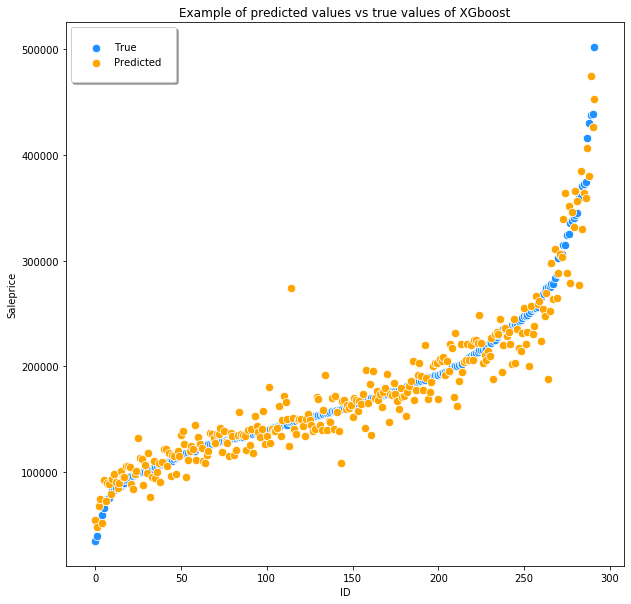

In [193]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=viz_df['id'], y = viz_df['True'], s = 70, label="True", color='dodgerblue', palette='colorblind')
sns.scatterplot(x=viz_df['id'], y = viz_df['pred'], s=70,  label="Predicted", color='orange', palette='colorblind', alpha=1)
plt.legend(fontsize='medium',fancybox=True, shadow=True, borderpad=1.5, framealpha=1)
plt.title('Example of predicted values vs true values of XGboost')
plt.xlabel('ID')
plt.ylabel('Saleprice')
plt.show()

In [167]:
importance_df = pd.DataFrame()
importance_df['feature'] = X_train2.columns
importance_df['importance'] = xgb_val.feature_importances_
importance_df.sort_values('importance', ascending=False)

,feature,importance
13,GrLivArea,0.219206
3,OverallQual,0.203935
22,GarageArea,0.076904
32,Neighborhood_Class,0.068904
10,BsmtFinSF1,0.055863
20,Fireplaces,0.039021
2,LotArea,0.037078
6,YearRemodAdd,0.025251
5,YearBuilt,0.021851
4,OverallCond,0.021775


In [168]:
ridge_val = linear_model.Ridge(alpha = 2, fit_intercept = True, max_iter = 'auto', normalize = False, solver = 'auto')

ridge_val.fit(X_train2, y_train2)
ridge_val_pred = ridge_val.predict(X_val2)

ridge_val_pred = np.exp(ridge_val_pred)


MAE_ridge_val_pred = mean_absolute_error(y_val2, ridge_val_pred)
print('MAE ridge pred:', MAE_ridge_val_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val2, ridge_val_pred )))

MAE ridge pred: 14372.228677555639
RMSLE 0.1137837484807959


In [169]:
viz_df2 = pd.DataFrame()

viz_df2['True'] = y_val2
viz_df2['pred'] = ridge_val_pred

viz_df2 = viz_df2.sort_values('True')
id_list= np.arange(0,292)
viz_df2['id'] = id_list

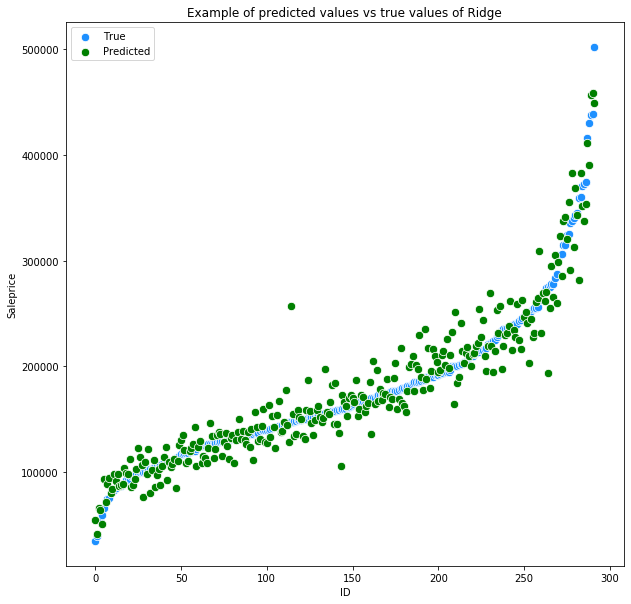

In [180]:
plt.rcParams["figure.figsize"] = (10,10)
plot = sns.scatterplot(x=viz_df2['id'], y = viz_df2['True'], s = 70, label='True', color='dodgerblue', palette='colorblind')
plot = sns.scatterplot(x=viz_df2['id'], y = viz_df2['pred'], s=70, label= 'Predicted', color='green', palette='colorblind')
#plt.legend(fontsize='medium',fancybox=True, shadow=True, borderpad=1.5, framealpha=1)
plt.title('Example of predicted values vs true values of Ridge')
plt.xlabel('ID')
plt.ylabel('Saleprice')
plt.show()

In [68]:
def feature_importance_CV2(range, importance_df):
    feature_importance_df= pd.DataFrame(columns=['Model', 'feature_amount', 'RMSLE', 'MAE'])
    
    for feature_amount in range:
        test_df = pd.DataFrame()
        
        for feature in importance_df.sort_values('importance', ascending=False).head(feature_amount).feature:
            test_df = pd.concat([test_df, train2[feature]], axis=1)
    
        test_df =  pd.concat([test_df, train2['SalePrice']], axis=1)
        
        kf = KFold(n_splits=5, random_state = 125, shuffle=True)

        X = test_df.drop(['SalePrice'], axis=1)
        y = test_df['SalePrice']
        
        
        for train_indexes, test_indexes in kf.split(X):
            X_train_K, X_val_K = X.values[train_indexes], X.values[test_indexes]
            y_train_K, y_val_K = y.values[train_indexes], y.values[test_indexes]
        
            y_train_K = np.log(y_train_K)
        

            ridge = linear_model.Ridge(alpha = 2, fit_intercept = True, max_iter = 'auto', normalize = False, solver = 'auto').fit(X_train_K, y_train_K)
            lasso = linear_model.Lasso(alpha=2).fit(X_train_K, y_train_K)

            ridge_pred = ridge.predict(X_val_K)
            lasso_pred = lasso.predict(X_val_K)

            ridge_pred = np.exp(ridge_pred)
            ridge_pred2 = ridge_pred
            lasso_pred = np.exp(lasso_pred)

            RMSLE_ridge_pred = np.sqrt(mean_squared_log_error( y_val_K, ridge_pred ))
            RMSLE_lasso_pred = np.sqrt(mean_squared_log_error( y_val_K, lasso_pred ))
            MAE_ridge_pred = mean_absolute_error(y_val_K, ridge_pred)
            MAE_lasso_pred = mean_absolute_error(y_val_K, lasso_pred)
        
            xgboost = xgb.XGBRegressor(max_depth = 3, min_child_weight = 1, gamma =  0, reg_alpha = 1, reg_lambda = 1,
                       subsample =  0.8, colsample_bytree = 0.9 ,  learning_rate =  0.01,
                       n_estimators =  5000, objective = 'reg:squarederror')


            xgboost.fit(X_train_K, y_train_K)
            xgb_pred = xgboost.predict(X_val_K)

            xgb_pred= np.exp(xgb_pred)
            xgb_pred2 = xgb_pred

            RMSLE_xgb_pred = np.sqrt(mean_squared_log_error( y_val_K, xgb_pred ))
            MAE_xgb_pred = mean_absolute_error(y_val_K, xgb_pred)
            
            rf = RandomForestRegressor(criterion= 'mse', max_depth = None, max_features = 'auto', min_samples_leaf = 1,
                                        min_samples_split = 2, n_estimators = 2000).fit(X_train_K, y_train_K)

            rf_pred = rf.predict(X_val_K)

            rf_pred = np.exp(rf_pred)
            
            RMSLE_rf_pred = np.sqrt(mean_squared_log_error( y_val_K, rf_pred ))
            MAE_rf_pred = mean_absolute_error(y_val_K, rf_pred)
            
            ensemble_list_custom = []
            ensemble_zip = zip(xgb_pred, ridge_pred)
            for xgb_pred, ridge_pred in ensemble_zip:
                if ridge_pred<200000:
                    pred = ((ridge_pred*2)+xgb_pred)/3
                    if pred<70000:
                        pred=pred*0.8
                    ensemble_list_custom.append(pred)
                else:
                    pred = ((xgb_pred*2)+ridge_pred)/3
                    if pred>450000:
                        pred= pred*1.1
                    ensemble_list_custom.append(pred)
            
            RMSLE_ensemble_custom = np.sqrt(mean_squared_log_error( y_val_K, ensemble_list_custom ))

            MAE_ensemble_custom = mean_absolute_error(y_val_K, ensemble_list_custom)
            
            ensemble_list = []
            ensemble_zip2 = zip(xgb_pred2, ridge_pred2)
            for xgb_pred2, ridge_pred2 in ensemble_zip2:
                if ridge_pred2<200000:
                    pred2 = ((ridge_pred2*2)+xgb_pred2)/3
                    ensemble_list.append(pred2)
                else:
                    pred2 = ((xgb_pred2*2)+ridge_pred2)/3
                    ensemble_list.append(pred2)
            
            RMSLE_ensemble = np.sqrt(mean_squared_log_error( y_val_K, ensemble_list ))

            MAE_ensemble = mean_absolute_error(y_val_K, ensemble_list)
            
            feature_importance_df = feature_importance_df.append({'Model': 'xgb-Ridge-ensemble', 'feature_amount': feature_amount, 
                                                             'RMSLE': RMSLE_ensemble, 'MAE': MAE_ensemble}, ignore_index=True)
            
            feature_importance_df = feature_importance_df.append({'Model': 'xgb-Ridge-ensemble-custom', 'feature_amount': feature_amount, 
                                                             'RMSLE': RMSLE_ensemble_custom, 'MAE': MAE_ensemble_custom}, ignore_index=True)
            
            feature_importance_df = feature_importance_df.append({'Model': 'RandomForest', 'feature_amount': feature_amount, 
                                                             'RMSLE': RMSLE_rf_pred, 'MAE': MAE_rf_pred}, ignore_index=True)

            feature_importance_df = feature_importance_df.append({'Model': 'Ridge', 'feature_amount': feature_amount, 
                                                             'RMSLE': RMSLE_ridge_pred, 'MAE': MAE_ridge_pred}, ignore_index=True)
            feature_importance_df = feature_importance_df.append({'Model': 'Lasso', 'feature_amount': feature_amount, 
                                                             'RMSLE': RMSLE_lasso_pred, 'MAE': MAE_lasso_pred}, ignore_index=True)
            feature_importance_df = feature_importance_df.append({'Model': 'XGboost', 'feature_amount': feature_amount, 
                                                             'RMSLE': RMSLE_xgb_pred, 'MAE': MAE_xgb_pred}, ignore_index=True)
            print('done')
    return feature_importance_df

In [69]:
final_model_val = feature_importance_CV2([1,5,10,50,70,100,200,249], importance_df)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [70]:
final_model_val.groupby(['Model','feature_amount']).mean().sort_values('RMSLE')

,,RMSLE,MAE
Model,feature_amount,,
xgb-Ridge-ensemble,70,0.113542,13762.726838
xgb-Ridge-ensemble-custom,50,0.113605,13784.895810
xgb-Ridge-ensemble,50,0.113790,13773.657486
xgb-Ridge-ensemble-custom,70,0.113934,13789.728270
xgb-Ridge-ensemble,100,0.113935,13761.904512
xgb-Ridge-ensemble-custom,100,0.114287,13754.346552
Ridge,70,0.114748,14215.054085
xgb-Ridge-ensemble,200,0.114904,13868.379429
Ridge,50,0.115269,14315.859454


In [71]:
final_model_val_MAE = final_model_val.copy(deep=True)

In [72]:
final_model_val_MAE.drop('RMSLE', axis=1, inplace=True)

In [73]:
final_model_val_MAE.head()

,Model,feature_amount,MAE
0,xgb-Ridge-ensemble,1,36649.949382
1,xgb-Ridge-ensemble-custom,1,36692.127703
2,RandomForest,1,43159.293349
3,Ridge,1,36038.563008
4,Lasso,1,54893.547695


In [74]:
final_model_val_MAE = final_model_val_MAE.pivot_table(values='MAE', columns='feature_amount', index=['Model'])

In [75]:
final_model_val_MAE= final_model_val_MAE.round(1)
final_model_val_MAE

feature_amount,1,5,10,50,70,100,200,249
Model,,,,,,,,
Lasso,54989.4,54989.4,43196.9,37820.2,37820.2,37820.2,37820.2,37820.2
RandomForest,43847.5,20158.3,17386.2,17278.1,17262.4,17285.9,17354.9,17313.7
Ridge,37160.1,21002.0,17469.1,14315.9,14215.1,14218.5,14408.1,14490.5
XGboost,39200.5,19180.2,15473.5,14387.2,14478.1,14419.5,14364.2,14371.9
xgb-Ridge-ensemble,37839.4,19030.7,15575.1,13773.7,13762.7,13761.9,13868.4,13921.8
xgb-Ridge-ensemble-custom,37842.3,19114.2,15597.0,13784.9,13789.7,13754.3,13877.0,13936.3


In [76]:
final_model_val_RMSLE = final_model_val.copy(deep=True)

In [77]:
final_model_val_RMSLE.drop('MAE', axis=1, inplace=True)

In [78]:
final_model_val_RMSLE = final_model_val_RMSLE.pivot_table(values='RMSLE', columns='feature_amount', index=['Model'])

In [79]:
final_model_val_RMSLE= final_model_val_RMSLE.round(5)
final_model_val_RMSLE

feature_amount,1,5,10,50,70,100,200,249
Model,,,,,,,,
Lasso,0.39649,0.39649,0.31711,0.27725,0.27725,0.27725,0.27725,0.27725
RandomForest,0.31446,0.16160,0.13933,0.13894,0.13891,0.13884,0.13932,0.13926
Ridge,0.27010,0.16159,0.13381,0.11527,0.11475,0.11564,0.11725,0.11839
XGboost,0.28016,0.15224,0.12689,0.11947,0.11971,0.11956,0.11966,0.11992
xgb-Ridge-ensemble,0.27284,0.15188,0.12519,0.11379,0.11354,0.11394,0.11490,0.11553
xgb-Ridge-ensemble-custom,0.27273,0.15211,0.12569,0.11360,0.11393,0.11429,0.11546,0.11631


In [185]:
train_df = pd.DataFrame()
        
for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    train_df = pd.concat([train_df, X_train[feature]], axis=1)

test_df = pd.DataFrame()
for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    test_df = pd.concat([test_df, X_test[feature]], axis=1)
    


xgb_243 = xgb.XGBRegressor(max_depth = 3, min_child_weight = 1, gamma =  0, reg_alpha = 1, reg_lambda = 1,
                       subsample =  0.8, colsample_bytree = 0.9 ,  learning_rate =  0.01,
                       n_estimators =  5000, objective = 'reg:squarederror')



xgb_243.fit(train_df, y_train)
xgb_243_pred = xgb_243.predict(test_df)

xgb_243_pred = np.exp(xgb_243_pred)


C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [186]:
xgb_243_pred1_df = pd.DataFrame({ 'Id': test_ids, 'SalePrice': xgb_243_pred})
xgb_243_pred1_df.to_csv('xgb_243_pred1.csv', header=['Id', 'SalePrice'], index=False)

In [189]:
train_df = pd.DataFrame()
        
for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    train_df = pd.concat([train_df, X_train[feature]], axis=1)

test_df = pd.DataFrame()

for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    test_df = pd.concat([test_df, X_test[feature]], axis=1)
    


ridge_243 = linear_model.Ridge(alpha = 2, fit_intercept = True, max_iter = 'auto', normalize = False, solver = 'auto')


ridge_243.fit(train_df, y_train)
ridge_243_pred = ridge_243.predict(test_df)

ridge_243_pred = np.exp(ridge_243_pred)

ridge_243_pred

array([116909.21778387, 154372.28210095, 179129.10243211, ...,
       177169.80955912, 117895.20370139, 210546.58840701])

In [190]:
ridge_243_pred1_df = pd.DataFrame({ 'Id': test_ids, 'SalePrice': ridge_243_pred})
ridge_243_pred1_df.to_csv('ridge_243_pred1.csv', header=['Id', 'SalePrice'], index=False)

In [39]:
train_df = pd.DataFrame()
        
for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    train_df = pd.concat([train_df, X_train[feature]], axis=1)

test_df = pd.DataFrame()

for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    test_df = pd.concat([test_df, X_test[feature]], axis=1)
    


ridge_243 = linear_model.Ridge(alpha = 2, fit_intercept = True, max_iter = 'auto', normalize = False, solver = 'auto')


ridge_243.fit(train_df, y_train)
ridge_243_pred = ridge_243.predict(test_df)

ridge_243_pred = np.exp(ridge_243_pred)

xgb_243 = xgb.XGBRegressor(max_depth = 3, min_child_weight = 1, gamma =  0, reg_alpha = 1, reg_lambda = 1,
                       subsample =  0.8, colsample_bytree = 0.9 ,  learning_rate =  0.01,
                       n_estimators =  5000, objective = 'reg:squarederror')


xgb_243.fit(train_df, y_train)
xgb_243_pred = xgb_243.predict(test_df)

xgb_243_pred = np.exp(xgb_243_pred)

xgb_243_pred


ensemble_list_custom = []
ensemble_zip = zip(xgb_243_pred, ridge_243_pred)
for xgb_pred, ridge_pred in ensemble_zip:
    if ridge_pred<200000:
        pred = ((ridge_pred*2)+xgb_pred)/3
        if pred<70000:
            pred=pred*0.8
        ensemble_list_custom.append(pred)
    else:
        pred = ((xgb_pred*2)+ridge_pred)/3
        if pred>450000:
            pred= pred*1.1
        ensemble_list_custom.append(pred)
ensemble_list_custom

C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[118714.1998767499,
 155881.62035896716,
 180195.52141307094,
 198020.54142250353,
 191059.35071306606,
 172363.37671872813,
 180996.88111706622,
 162585.9972285584,
 192287.26639885336,
 115195.48483605175,
 170095.66005665847,
 96560.92841441091,
 96697.62101682874,
 141152.61085342374,
 110698.70579959553,
 370918.0946464192,
 256758.60305192453,
 289462.2927611956,
 284510.3234005468,
 569486.237563897,
 322779.5031222557,
 209413.35476038945,
 176341.90511761126,
 158579.34027297687,
 185850.171184963,
 192809.95026476565,
 337647.77638216334,
 229894.31056405595,
 195931.24537878748,
 229187.0672147251,
 191523.32285817005,
 98971.1838906149,
 183704.6848891757,
 294895.3051576363,
 283725.47102726507,
 233392.16881602278,
 178389.2813178148,
 176362.6680004124,
 165732.27671476375,
 157443.35864966013,
 186090.0540797542,
 145953.89272295966,
 280065.7539968774,
 245986.00431811702,
 221383.61250615446,
 195393.92592694573,
 251615.78883909175,
 201305.50219914908,
 167090.02210

In [40]:
ridge_xgb_243_pred1_df = pd.DataFrame({ 'Id': test_ids, 'SalePrice': ensemble_list_custom})
ridge_xgb_243_pred1_df.to_csv('ridge_xgb_243_pred1.csv', header=['Id', 'SalePrice'], index=False)

In [404]:
## continue trying models with different feature values on kaggle


In [49]:
train_df = pd.DataFrame()
        
for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    train_df = pd.concat([train_df, X_train[feature]], axis=1)

test_df = pd.DataFrame()

for feature in importance_df.sort_values('importance', ascending=False).head(243).feature:
    test_df = pd.concat([test_df, X_test[feature]], axis=1)
    


ridge_243 = linear_model.Ridge(alpha = 2, fit_intercept = True, max_iter = 'auto', normalize = False, solver = 'auto')


ridge_243.fit(train_df, y_train)
ridge_243_pred = ridge_243.predict(test_df)

ridge_243_pred = np.exp(ridge_243_pred)

xgb_243 = xgb.XGBRegressor(max_depth = 3, min_child_weight = 1, gamma =  0, reg_alpha = 1, reg_lambda = 1,
                       subsample =  0.8, colsample_bytree = 0.9 ,  learning_rate =  0.01,
                       n_estimators =  5000, objective = 'reg:squarederror')


xgb_243.fit(train_df, y_train)
xgb_243_pred = xgb_243.predict(test_df)

xgb_243_pred = np.exp(xgb_243_pred)

xgb_243_pred


ensemble_list_custom = []
ensemble_zip = zip(xgb_243_pred, ridge_243_pred)
for xgb_pred, ridge_pred in ensemble_zip:
    if ridge_pred<200000:
        pred = ((ridge_pred*2)+xgb_pred)/3
        ensemble_list_custom.append(pred)
    else:
        pred = ((xgb_pred*2)+ridge_pred)/3
        ensemble_list_custom.append(pred)
ensemble_list_custom

C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[118714.1998767499,
 155881.62035896716,
 180195.52141307094,
 198020.54142250353,
 191059.35071306606,
 172363.37671872813,
 180996.88111706622,
 162585.9972285584,
 192287.26639885336,
 115195.48483605175,
 170095.66005665847,
 96560.92841441091,
 96697.62101682874,
 141152.61085342374,
 110698.70579959553,
 370918.0946464192,
 256758.60305192453,
 289462.2927611956,
 284510.3234005468,
 517714.7614217245,
 322779.5031222557,
 209413.35476038945,
 176341.90511761126,
 158579.34027297687,
 185850.171184963,
 192809.95026476565,
 337647.77638216334,
 229894.31056405595,
 195931.24537878748,
 229187.0672147251,
 191523.32285817005,
 98971.1838906149,
 183704.6848891757,
 294895.3051576363,
 283725.47102726507,
 233392.16881602278,
 178389.2813178148,
 176362.6680004124,
 165732.27671476375,
 157443.35864966013,
 186090.0540797542,
 145953.89272295966,
 280065.7539968774,
 245986.00431811702,
 221383.61250615446,
 195393.92592694573,
 251615.78883909175,
 201305.50219914908,
 167090.0221

In [50]:
ridge_xgb_243_pred1_df = pd.DataFrame({ 'Id': test_ids, 'SalePrice': ensemble_list_custom})
ridge_xgb_243_pred1_df.to_csv('ridge_xgb_243_pred1_not_custom.csv', header=['Id', 'SalePrice'], index=False)

In [58]:
data_onehot['PoolArea'].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

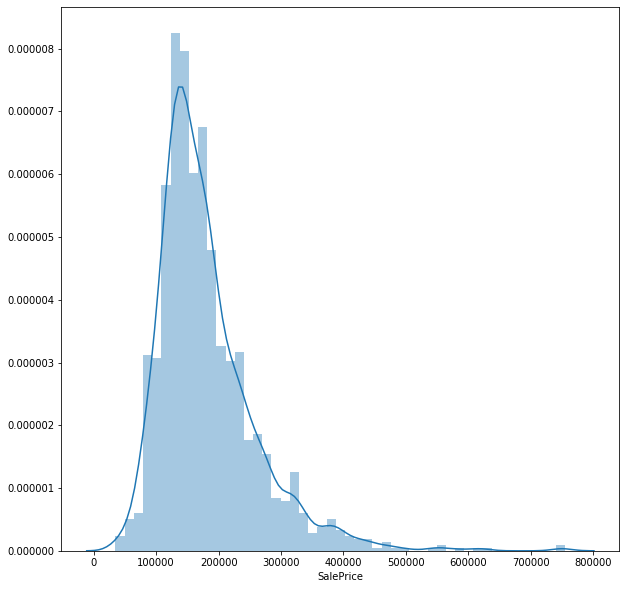

In [198]:
sns.distplot(SalePrice)

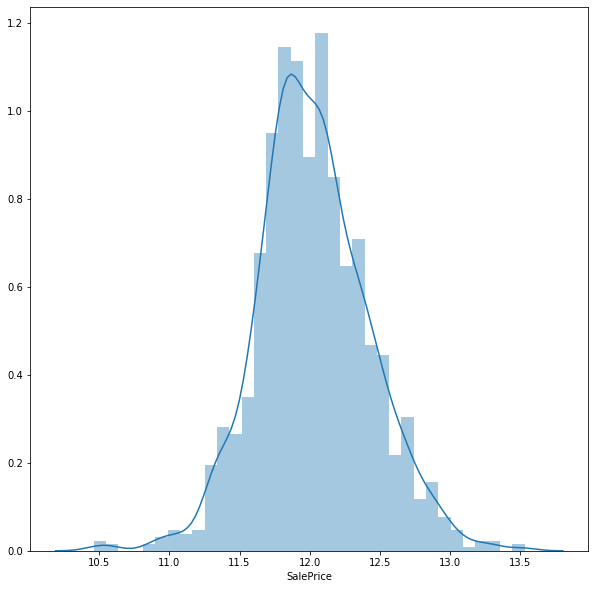

In [199]:
sns.distplot(np.log(SalePrice))